In [19]:
#Set Up Dependancies
import pandas as pd
import requests
import time
from config import nyt_api_key
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Set url for api call
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

In [3]:
#define search parameters
#params = {
#    'begin_date':'20130101',
#    'end_date':'20131231',
#    'q':'Environment OR climate',
#    'api-key':'JLNlZHr6nGTLEEn8vkiuBQX07ZNc7I4G'
#    }

#response = requests.get(base_url, params=params)
#response = response.json()
#response['response']['meta']['hits']

In [3]:
#define initial parameters
params = {
    'api-key': nyt_api_key,
    'q':'Environment OR climate'
}

#define empty array for article counts
nyt_arts_list = []

for y in range(2013, 2023+1):
    #create time from (tf) and time to (tt) values
    #bd = f"{y}0101"
    #ed = f"{y}1231"
    
    #add to our dictionary of params
    params['begin_date'] = f"{y}0101"
    params['end_date'] = f"{y}1231"
    
    #get response from first query
    response = requests.get(base_url, params=params).json()
    
    #add to climate change list of articles
    nyt_arts_list.append(response['response']['meta']['hits'])
    
    #add a sleep between iterations to avoid getting banned, whoops
    time.sleep(15)

#printing out list of articles for reference
nyt_arts_list

[472, 530, 641, 588, 1049, 1253, 1510, 1379, 1590, 1638, 350]

In [25]:
df = pd.DataFrame({
    "Years":range(2013,2023+1),
    "#Articles":nyt_arts_list
})
df

,Years,#Articles
0,2013,472
1,2014,530
2,2015,641
3,2016,588
4,2017,1049
5,2018,1253
6,2019,1510
7,2020,1379
8,2021,1590
9,2022,1638


In [84]:
energy_data = "Resources/EnergyJV.csv"
energy_data_df = pd.read_csv(energy_data)

In [163]:
energy_data_t = energy_data_df.transpose()
energy_data_t.set_axis(energy_data_t.iloc[0], axis=1, inplace=True)
energy_data_t = energy_data_t[3:]
energy_data_t.rename(columns={'description':'date'})
energy_data_t


description,United States : all fuels (utility-scale),United States : coal,United States : petroleum liquids,United States : petroleum coke,United States : natural gas,United States : other gases,United States : nuclear,United States : conventional hydroelectric,United States : other renewables,United States : wind,...,Hawaii : all utility-scale solar,Hawaii : geothermal,Hawaii : biomass,Hawaii : wood and wood-derived fuels,Hawaii : other biomass,Hawaii : hydro-electric pumped storage,Hawaii : other,Hawaii : all solar,Hawaii : small-scale solar photovoltaic,Hawaii : all utility-scale solar
Jan-01,332493,177287,17300,812,42389,718,68707,18852,NaN,389,...,--,21,21,--,21,--,12,--,--,--
Feb-01,282940,149735,9626,716,37967,676,61272,17473,NaN,431,...,--,15,21,--,21,--,12,--,--,--
Mar-01,300707,155269,10981,752,44364,769,62141,20477,NaN,532,...,--,18,12,--,12,--,5,--,--,--
Apr-01,278079,140671,10237,627,45843,698,56003,18013,NaN,685,...,--,18,25,--,25,--,15,--,--,--
May-01,300492,151593,9641,749,50934,785,61512,19176,NaN,635,...,--,20,28,--,28,--,17,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nov-21,315495,57160,845,778,122458,877,62749,20460,NaN,36043,...,39,NM,25,0,25,--,31,130,91,39
Dec-21,339684,59878,912,564,127169,889,70720,25650,NaN,40676,...,30,NM,24,0,24,--,32,111,82,30
Jan-22,378967,87506,3254,531,136317,971,70577,27017,NaN,38194,...,36,NM,25,0,25,--,31,130,93,36
Feb-22,327767,70762,1000,605,115615,832,61862,23670,NaN,38162,...,40,NM,21,0,21,--,27,133,92,40


In [70]:
xr = energy_data_t.shape[0]

In [89]:
years = list(range(1,21))
years

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [99]:
emissions_by_month = []
for x in range(1,21):
    if x < 10:
        emissions_by_month.append(energy_data_t.loc[energy_data_t.index.str.contains(f"0{x}"),["United States : all fuels (utility-scale)"]])
    else:
        emissions_by_month.append(energy_data_t.loc[energy_data_t.index.str.contains(f"{x}"),["United States : all fuels (utility-scale)"]])

emissions_by_month

[description United States : all fuels (utility-scale)
 Jan-01                                         332493
 Feb-01                                         282940
 Mar-01                                         300707
 Apr-01                                         278079
 May-01                                         300492
 Jun-01                                         327694
 Jul-01                                         357614
 Aug-01                                         370533
 Sep-01                                         306929
 Oct-01                                         294734
 Nov-01                                         278934
 Dec-01                                         305496,
 description United States : all fuels (utility-scale)
 Jan-02                                         319941
 Feb-02                                         281826
 Mar-02                                         302549
 Apr-02                                         289848
 May-02  

In [159]:
emissions_by_year = []
for x in range(1,21):
    if x < 10:
        emissions_by_year.append(energy_data_t.loc[energy_data_t.index.str.contains(f"0{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum(axis=None))
    else:
        emissions_by_year.append(energy_data_t.loc[energy_data_t.index.str.contains(f"{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum(axis=None))

KeyError: "None of [Index(['United States : all fuels (utility-scale)'], dtype='object')] are in the [columns]"

In [160]:
emissions_by_year = []
for x in range(1,21):
    if x < 10:
        emissions_by_year.append(energy_data_t.loc[energy_data_t['index'].str.contains(f"0{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum(axis=None))
    else:
        emissions_by_year.append(energy_data_t.loc[energy_data_t['index'].str.contains(f"{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum(axis=None))

KeyError: 'index'

In [161]:
energy_data_t.loc[energy_data_t.str.contains(f"0{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum()

AttributeError: 'DataFrame' object has no attribute 'str'

In [157]:
emissions_by_year

[]

In [14]:
co2_data = "Resources/CO2_emission_by_countries.csv"
co2_data_df = pd.read_csv(co2_data, encoding="ISO-8859-1")
co2_data_df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


In [32]:
#2001 

temp_df = co2_data_df.loc[(co2_data_df['Year'] >= 2001) & (co2_data_df['Country'] == 'United States') ]

us_co2_df = temp_df[['Year','CO2 emission (Tons)']].copy()
us_co2_df


,Year,CO2 emission (Tons)
57161,2001,3.100000e+11
57162,2002,3.160000e+11
57163,2003,3.220000e+11
57164,2004,3.280000e+11
57165,2005,3.340000e+11
57166,2006,3.400000e+11
57167,2007,3.470000e+11
57168,2008,3.530000e+11
57169,2009,3.580000e+11
57170,2010,3.640000e+11


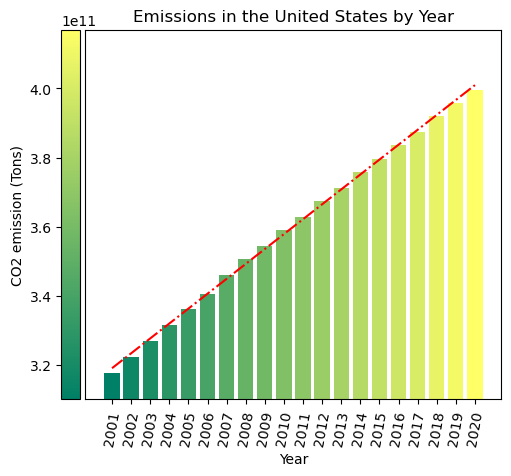

In [106]:
# Create the bar chart
fig, ax = plt.subplots()

# Define a color gradient from blue to red
colors = plt.cm.ScalarMappable(cmap='summer')

x = us_co2_df['Year']
y = us_co2_df['CO2 emission (Tons)']

# Create the bars with gradient color
bars = ax.bar(x, y, color=colors.to_rgba(y))

# Set the y-axis label and units
ax.yaxis.set_visible(False)

# Add a colorbar
cbar = plt.colorbar(colors, ax=[ax], location='left')
cbar.ax.set_ylabel("CO2 emission (Tons)")

# Set the x-axis label and tick labels
ax.set_xlabel("Year")
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=80)


# Add a line plot on top of the bar chart
#ax.plot(x, y, color='red')

# Set the plot title
ax.set_title("Emissions in the United States by Year")

# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.25)

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
ax.plot(x, slope*x + intercept, color="red", linestyle="dashdot")

# Set minimum Y axis value
ax.set_ylim(bottom=3.0e11)



# Display the chart
plt.show()

In [38]:
#Predictions
pred_2033 = slope * 2033 + intercept
pred_2053 = slope * 2053 + intercept
pred_2123 = slope * 2123 + intercept
print(f"In 2033, the United States is on track to emit {round(pred_2033 ,-6)} tons of C02.")
print(f"In 2053, the United States is on track to emit {round(pred_2053, -6)} tons of C02.")
print(f"In 2123, the United States is on track to emit {round(pred_2123, -6)} tons of C02.")

In 2033, the United States is on track to emit 492078000000.0 tons of C02.
In 2053, the United States is on track to emit 604770000000.0 tons of C02.
In 2123, the United States is on track to emit 999191000000.0 tons of C02.


In [27]:
df.to_csv('Resources/nytartscounts.csv',index=False)

In [141]:
new_df = pd.DataFrame({
    'year':us_co2_df['Year'],
    'emissions':emissions_by_year
})

new_df

,year,emissions
57161,2001.0,NaN
57162,2002.0,NaN
57163,2003.0,NaN
57164,2004.0,NaN
57165,2005.0,NaN
57166,2006.0,NaN
57167,2007.0,NaN
57168,2008.0,NaN
57169,2009.0,NaN
57170,2010.0,NaN


In [164]:
emissions_by_year = []
for x in range(1,21):
    if x < 10:
        emissions_by_year.append(energy_data_t.loc[energy_data_t.index.str.contains(f"0{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum(axis=None))
    else:
        emissions_by_year.append(energy_data_t.loc[energy_data_t.index.str.contains(f"{x}"),["United States : all fuels (utility-scale)"]].astype(int).sum(axis=None))

In [167]:
emissions_by_year[0]

description
United States : all fuels (utility-scale)    3736645
dtype: int64

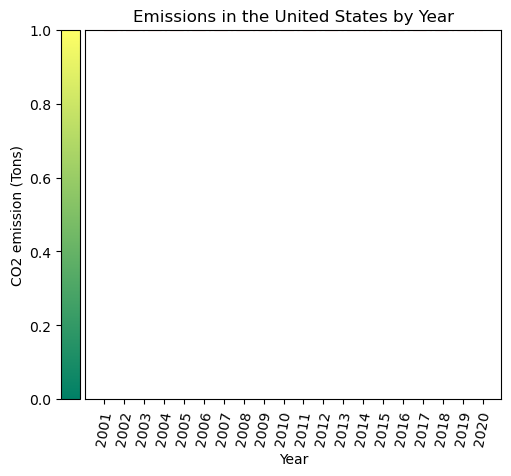

In [135]:
#for energy output
# Create the bar chart
fig, ax = plt.subplots()

# Define a color gradient from blue to red
colors = plt.cm.ScalarMappable(cmap='summer')

x = us_co2_df['Year']
y = emissions_by_year

# Create the bars with gradient color
bars = ax.bar(x, y, color=colors.to_rgba(y))

# Set the y-axis label and units
ax.yaxis.set_visible(False)

# Add a colorbar
cbar = plt.colorbar(colors, ax=[ax], location='left')
cbar.ax.set_ylabel("CO2 emission (Tons)")

# Set the x-axis label and tick labels
ax.set_xlabel("Year")
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=80)


# Add a line plot on top of the bar chart
#ax.plot(x, y, color='red')

# Set the plot title
ax.set_title("Emissions in the United States by Year")

# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.25)

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
ax.plot(x, slope*x + intercept, color="red", linestyle="dashdot")

# Set minimum Y axis value
ax.set_ylim(bottom=3.0e11)



# Display the chart
plt.show()